In [0]:
!git clone https://github.com/brendenlake/omniglot.git
!unzip omniglot/python/images_background.zip 

In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os.path

from PIL import Image
from tensorflow.python import keras
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


train_x = np.zeros((19280,105,105))
print(train_x.shape)
train_y = np.zeros((19280))

print(train_x.shape)

i=0
arc = os.path.join("images_background")
for alphabet in os.listdir(arc):
    for characters in os.listdir(os.path.join(arc,alphabet)):
        for sub in os.listdir(os.path.join(arc,alphabet,characters)):
            path = os.path.join(arc,alphabet,characters,sub)
            img = Image.open(path)
            train_x[i,:,:] = np.asarray(img.getdata()).reshape(img.size)
            train_y[i] = int(path[path.find('.png')-7:path.find('.png')-3])
            #print(train_y[i])
            i += 1  
            


(19280, 105, 105)
(19280, 105, 105)


In [28]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
train_y = tf.keras.utils.to_categorical(train_y)         
print(train_y.shape)
print(train_x.shape)

(19280, 965)
(19280, 105, 105, 1)


In [19]:
plt.figure(100)
class_num = 679
#plt.imshow(train_x[np.where(train_y==class_num)][0:10].reshape(105*10,105))

plt.figure(101)
#plt.imshow(train_x[np.where(train_y==class_num)][10:20].reshape(10*105,105))
print(path)
print(int(path[path.find('.png')-7:path.find('.png')-3]))


images_background/Malay_(Jawi_-_Arabic)/character22/0577_02.png
577


In [53]:
convnet = tf.keras.Sequential()
model = tf.keras.Sequential()

#convolution layer 1
convnet.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',
                                 activation='relu',input_shape=(28,28,1)))
convnet.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
convnet.add(tf.keras.layers.Dropout(0.3))

#convolution layer 2
convnet.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',
                                 activation='relu',))
convnet.add(tf.keras.layers.MaxPooling2D(pool_size=(2)))
convnet.add(tf.keras.layers.Dropout(0.2))

#dense
model.add(convnet)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256,activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(256,activation='softmax'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10,activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer ='adam')

#conv = model.predict(train_x[0].reshape(1,105,105,1))#model.predict(train_x[0].reshape(1,105,105,1))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 7, 7, 32)          8544      
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               401664    
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
__________

In [56]:
!wget "https://www.kaggleusercontent.com/kf/5461468/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..BHK15exZly-3Tgu7KEb-zA.SNZqTnAIw8za_xH9o5-Ov80vvG4x9Qt8pliyy42U_Wd6Bz2-HmL6Qi4_b2-QqdyRughSbNyOkN-_XKpJgdLHasjc_ESQosBhFHNxC4jB6G8R_Jq45QbJm8aRlsG8yxWmZBQsb0l7KBmj7mWIU-Ewpw.uD88CZ1MWEDSl_vBnZGQKg/model.weights.last.hdf5"


Redirecting output to ‘wget-log.1’.


In [60]:
model.load_weights("model.weights.last.hdf5")

ValueError: ignored

In [52]:
print(train_x.shape)
model.fit(train_x[0:100,:,:,:],train_y[0:100,:,:,:],validation_split=0.2,batch_size=128,epochs=1)

(19280, 105, 105, 1)


IndexError: ignored

87


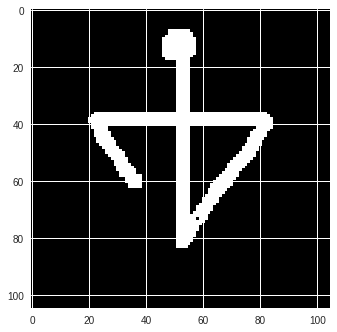

In [49]:
s =model.predict(train_x[10900,:,:,:].reshape(1,105,105,1))
res = np.argmax(s)
print (res)
plt.imshow(train_x[10900,:,:,:].reshape(train_x.shape[1],train_x.shape[2]))